<h1><center>Telecom Customer Churn Data Analysis</center>

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

In [2]:
# Ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in Pandas without truncating
pd.set_option('display.max_columns', None)

# Get the cividis colormap and add gray as second color
cividis = colormaps['cividis'] 
colors = [cividis(0.0), 'gray']  # dark blue, gray

# Set Seaborn style to white
sns.set_style('whitegrid')

In [3]:
# Load the data
df = pd.read_excel("data/cleaned_telecom_customer_churn.xlsx")

In [4]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Correlation

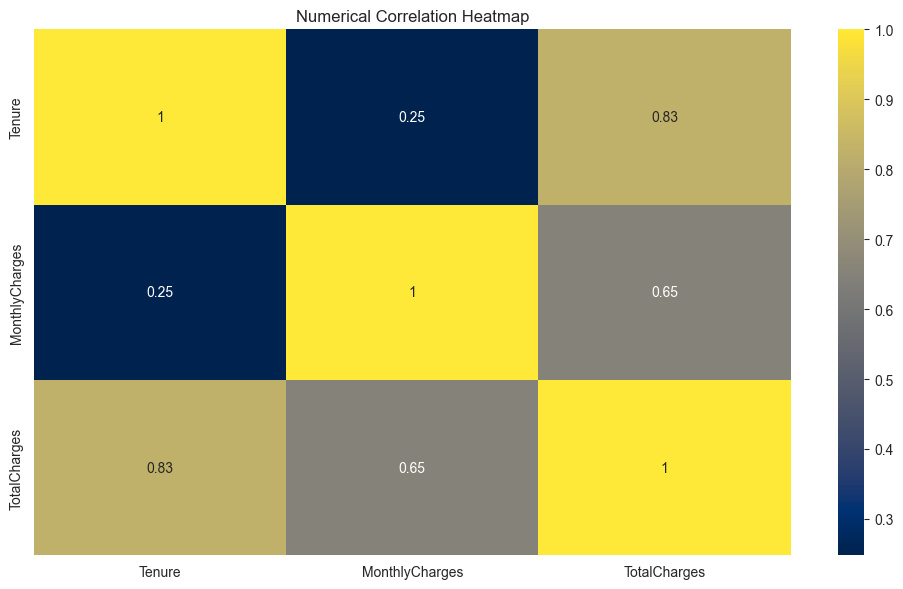

In [5]:
# Select columns that are not objects
num_cols = df.select_dtypes(exclude=['object']).columns

# Find the correlation matrix
corr = df[num_cols].corr()

# Construct the Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2g', cmap='cividis')
plt.title('Numerical Correlation Heatmap')
plt.tight_layout()
plt.savefig('churn_analysis_visuals/numerical_heatmap')
plt.show()

- Tenure has high 0.83 positive correlation with Total Charges, which is reasonable considering the longer a customer stays with the company, the more money they will have paid.
- Monthly Charges has a moderate 0.65 positive correlation with Total Charges, indicating that a number of customers change their plans internally or get charged different monthly fees by getting add-ons while they are suscribed.
- These customers may have received promotional rates first but stayed after returning to normal charges, changed to another plan within the company's selection, or purchased add-ons or bundles.
- Monthly Charges has a weak 0.25 positive correlation with Tenure, signaling that customers may have switched to cheaper plans internally or incurred other expenses through additional add-on purchases or bundles.

# Numerical Feature Distributions

## Total Charges

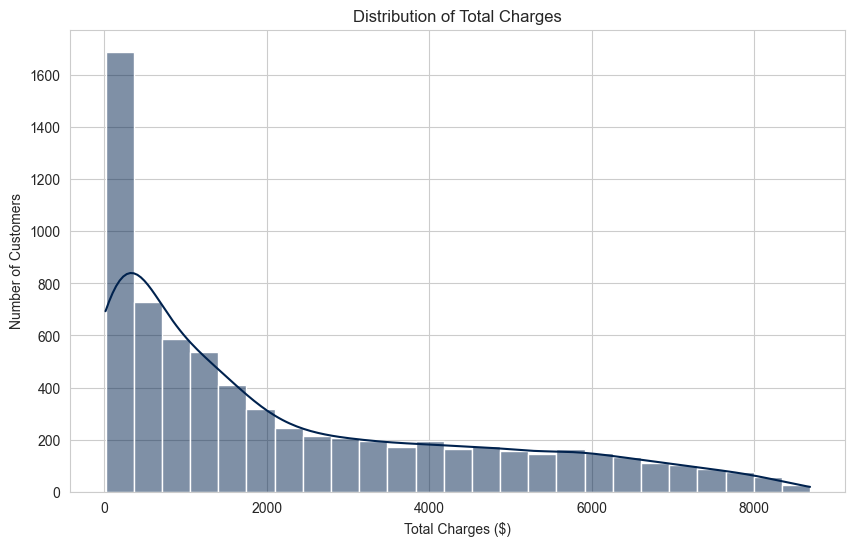

In [6]:
# Plot the distribution of Total Charges
plt.figure(figsize=(10,6))
sns.histplot(data=df, x=df['TotalCharges'], kde=True, color=cividis(0.0))
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Number of Customers')
plt.savefig('churn_analysis_visuals/distribution_total_charges')
plt.show()

- The company's has a consistently decreasing number of customers as Total Charges goes up. The rate of decrease is initially rapid (at lower levels of total charges) but tapers off at higher levels of total charges.
- The majority of the company's customers are likely new customers or customers with cheaper plans, since bins with the lowest total charges have the most customers. 

## Monthly Charges

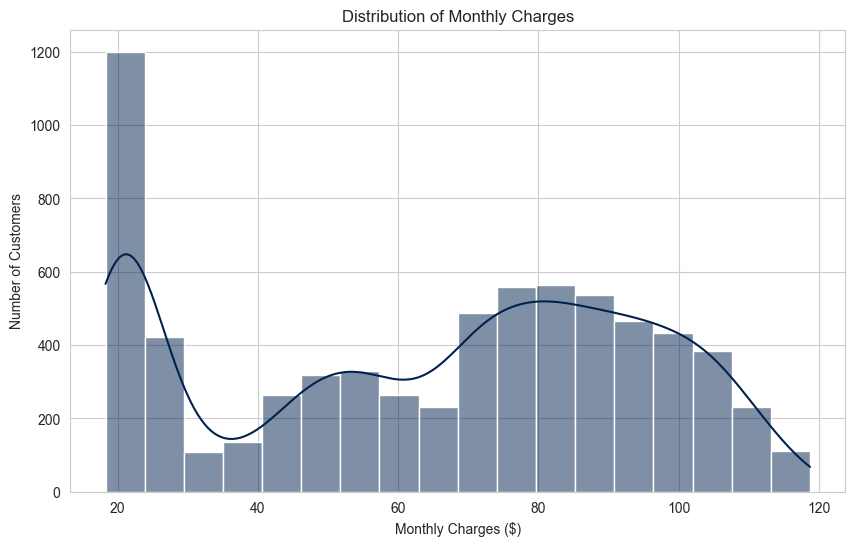

In [7]:
# Plot the distribution of Monthly Charges
plt.figure(figsize=(10,6))
sns.histplot(data=df, x=df['MonthlyCharges'], kde=True, color=cividis(0.0))
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.savefig('churn_analysis_visuals/distribution_monthly_charges')
plt.show()

- The largest bin of customers have Monthly Charges of around \$20, which should represent cheap, single line plans.
- For other levels of Monthly Charges, there are distinct a bell shaped curves at around 40 to 70 dollars of charges then another taller bell curve from 70 to 120 dollars.
- These regions can represent different customer segments based on levels of Monthly Charges that can be targeted differently.

### $30-70 Group

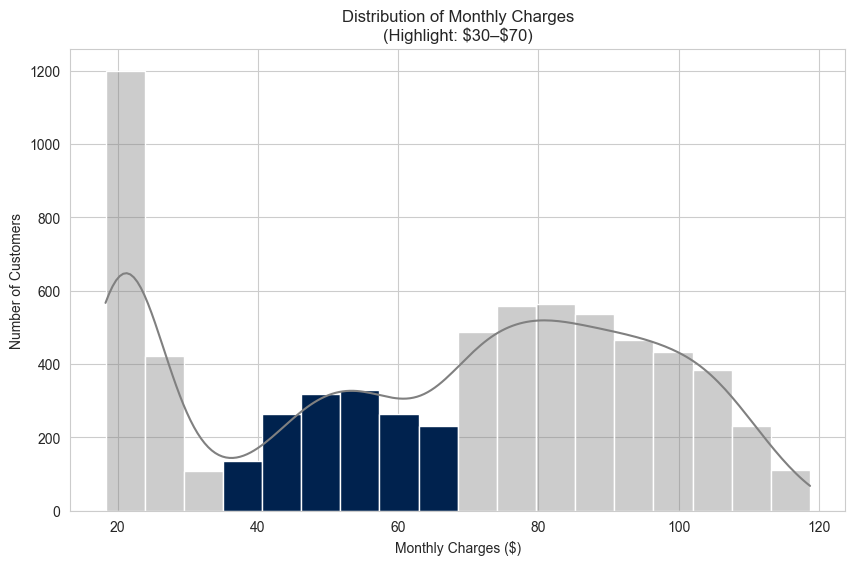

In [8]:
# Set the Figure and Size
plt.figure(figsize=(10,6))

# Plot the histogram once (all dimmed initially)
ax = sns.histplot(
    data=df, 
    x=df['MonthlyCharges'], 
    color='gray', 
    alpha=0.4, 
    edgecolor=None,
    kde=True
)

# Recolor bars that fall within 30–70
for patch in ax.patches:
    bin_left = patch.get_x()
    bin_right = patch.get_x() + patch.get_width()
    
    if (bin_left >= 30) and (bin_right <= 70):
        patch.set_facecolor(cividis(0.0))

plt.title('Distribution of Monthly Charges\n(Highlight: \$30–$70)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.savefig('churn_analysis_visuals/distribution_monthly_charges_30-70')
plt.show()

- For this customer segment, the company should focus on flexibility and affordability.
- Offer personalized phone upgrades based on usage patterns.
- Highlight features these customers is missing out on like speeds or no throttling.
- Send anniversary messages or small rewards.
- Invite these customers to beta programs or exclusive events.
- Encourage these customers to refer friends/family with bonuses.
- Provide tips or tutorials to help these customers get more out of their current plan.

### $70-120 Group

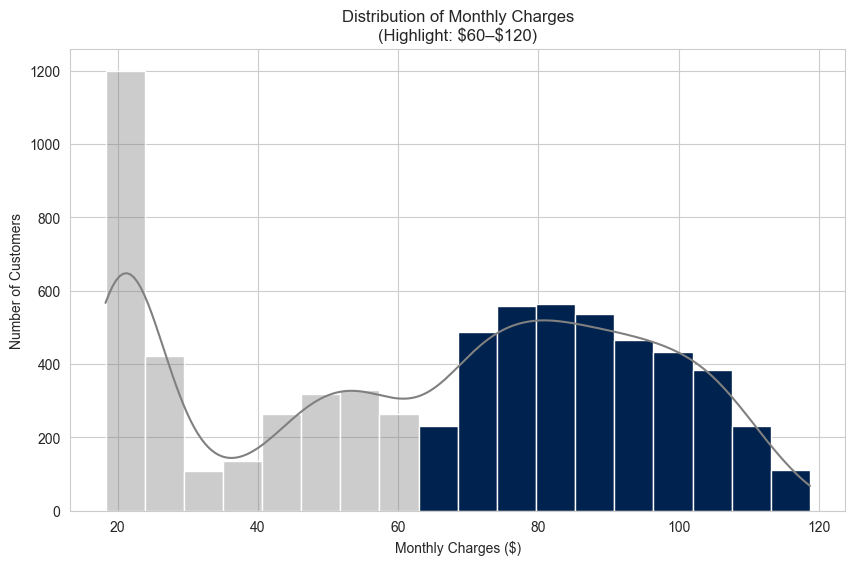

In [9]:
# Set the Figure and Size
plt.figure(figsize=(10,6))

# Plot the histogram once (all dimmed initially)
ax = sns.histplot(
    data=df, 
    x=df['MonthlyCharges'],  
    color='gray', 
    alpha=0.4, 
    edgecolor=None,
    kde=True
)

# Recolor bars that fall within 60-120
for patch in ax.patches:
    # Each patch is a bar (rectangle)
    bin_left = patch.get_x()
    bin_right = patch.get_x() + patch.get_width()
    
    if (bin_left >= 60) and (bin_right <= 120):
        patch.set_facecolor(cividis(0.0))

plt.title('Distribution of Monthly Charges\n(Highlight: \$60–$120)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.savefig('churn_analysis_visuals/distribution_monthly_charges_60-120')
plt.show()

- For this customer group, the company should focus on premium features and reliability.
- Offer priority customer service or dedicated account managers.
- Provide early access to new features or services.
- Give these customers VIP status with perks like free upgrades, bundled discounts, or loyalty tiers.
- Perform regular check-ins to ensure customer satisfaction.
- Ask for feedback and make these customers feel their voices are heard.
- Monitor for any signs of dissatisfaction or lower usage. Intervene early with personalized offers or support to prevent this group especially from churning.

## Tenure

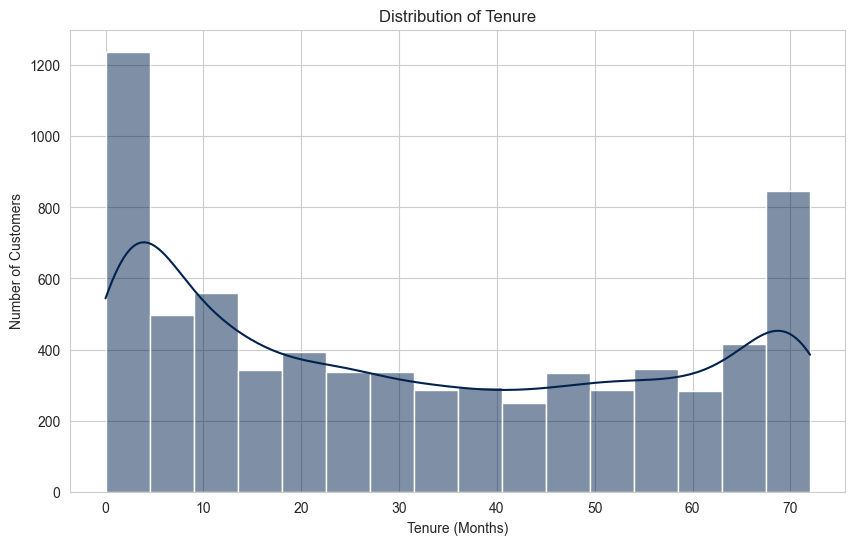

In [10]:
# Plot the distribution of Tenure
plt.figure(figsize=(10,6))
sns.histplot(data=df, x=df['Tenure'], kde=True, color=cividis(0.0))
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.savefig('churn_analysis_visuals/distribution_tenure')
plt.show()

- The company's largest customer counts come from their lowest tenure (newest customers) and highest tenure (the oldest customers), especially the lowest tenure group.
- The lowest tenure group has at least 50% more customers than any other group, including the group with the second most number of customers.
- Other tenure groups have roughly the same number of customers on average.

# Churn Proportion Analysis for Key Features

In [11]:
# Define a stacked bar chart plotting function
def plot_churn_stacked_bar(df, category_col, churn_col='Churn', colors=None,
                           title=None, xlabel=None, ylabel='Percentage (%) of Customers',
                           fmt='%.0f%%', label_color='white', figsize=(10,6), save_path=None):
    """
    Creates a stacked bar chart of churn proportions for a given categorical column.

    Parameters
    ----------
    df : DataFrame
        The input dataframe.
    category_col : str
        Column name for the x-axis categories (e.g. 'Contract').
    churn_col : str, default 'Churn'
        Column name for the churn column.
    colors : list, optional
        List of colors for the bars.
    title, xlabel, ylabel : str, optional
        Chart titles and labels.
    fmt : str, default '%.0f%%'
        Format for the labels.
    label_color : str, default 'white'
        Color of the labels inside the bars.
    figsize : tuple, default (10,6)
        Size of the figure.
    """

    # Create counts and percentages
    counts = df.groupby([category_col, churn_col]).size().unstack().fillna(0)
    pct = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot the stacked bar chart
    ax = pct.plot(kind='bar', stacked=True, color=colors, figsize=figsize)

    # Annotate bars
    for container in ax.containers:
        ax.bar_label(container, fmt=fmt, label_type='center', color=label_color)

    # Add title, labels, legend, rotate x labels, save and show the plot
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title='Churned', bbox_to_anchor=(1,1))
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

## Contract Churn Proportions

The number of churned customers is negatively correlated with contract length. Significantly more customers churned when they had Month to Month Contracts compared to customers with 1 year or 2 year contracts.

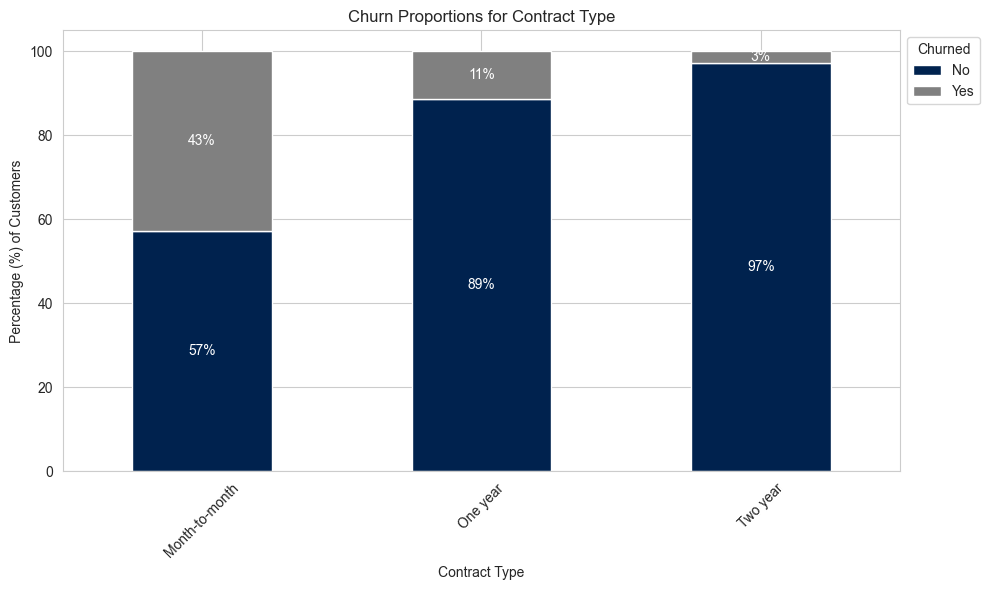

In [12]:
# Plot Contract Tyoe Churn Proportions
plot_churn_stacked_bar(
    df, 
    'Contract', 
    colors=colors,
    title='Churn Proportions for Contract Type', 
    xlabel='Contract Type',
    save_path = 'churn_analysis_visuals/churn_by_contract'
)

- The churn rate drastically decreases between contract types.
- Customers on One-Year contract have around a quarter of the churn rate as those on Month-to-Month contracts.
- Those on Two-Year contracts in turn, have around a quarter of the churn rate as those on One-Year contracts.
- The churn rate of those on Month-to-Month contracts is around 14 times that of those on Two-Year contracts.

### Contract Churn Pie

In [13]:
# Load the encoded dataset
df_encoded = pd.read_excel('data/encoded_telecom_customer_churn.xlsx')

# Find the total number of customers
total_customers = len(df_encoded)

# Define queries and labels
contract_churns = [
    ('Churners with Month-to-Month', 'Churn == 1 and `Contract_One year` == 0 and `Contract_Two year` == 0'),
    ('Churners with 1 year', 'Churn == 1 and `Contract_One year` == 1'),
    ('Churners with 2 year', 'Churn == 1 and `Contract_Two year` == 1'),
    ('Non-Churners with Month-to-Month', 'Churn == 0 and `Contract_One year` == 0 and `Contract_Two year` == 0'),
    ('Non-Churners with 1 year', 'Churn == 0 and `Contract_One year` == 1'),
    ('Non-Churners with 2 year', 'Churn == 0 and `Contract_Two year` == 1')
]

# Print percentage for each group
for label, query in contract_churns:
    count = df_encoded.query(query).shape[0]
    pct = (count / total_customers) * 100
    print(f"{label}: {count} ({pct:.2f}%)")

Churners with Month-to-Month: 1655 (23.50%)
Churners with 1 year: 166 (2.36%)
Churners with 2 year: 48 (0.68%)
Non-Churners with Month-to-Month: 2220 (31.52%)
Non-Churners with 1 year: 1307 (18.56%)
Non-Churners with 2 year: 1647 (23.38%)


- The company's overall churn rate is around 25%.
- People with Month-to-Month contracts make up a little over half of the company's total customers.
- The number of churning customers drastically decreases between contract types.

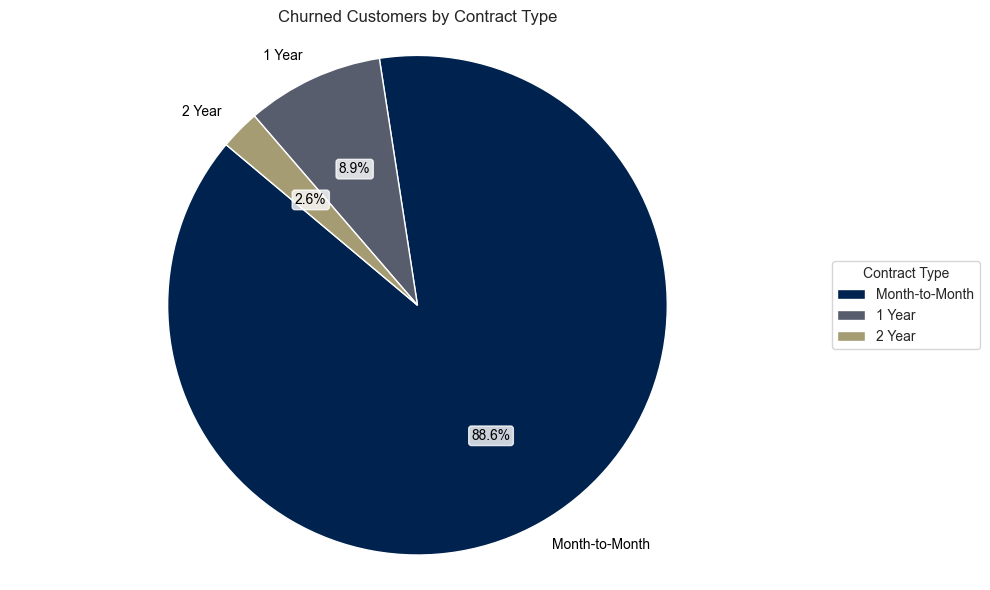

In [14]:
# Filter for only churned customers by contract type
churned_contracts = {
    'Month-to-Month': df_encoded.query('Churn == 1 and `Contract_One year` == 0 and `Contract_Two year` == 0').shape[0],
    '1 Year': df_encoded.query('Churn == 1 and `Contract_One year` == 1').shape[0],
    '2 Year': df_encoded.query('Churn == 1 and `Contract_Two year` == 1').shape[0]
}

# Extract labels and values
labels = list(churned_contracts.keys())
sizes = list(churned_contracts.values())

# Number of slices
n = len(sizes)

# Generate colors from cividis colormap
cmap = plt.get_cmap('cividis')
colors = [cmap(i / n) for i in range(n)]

# Plot the pie chart
plt.figure(figsize=(10,6))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140,
    textprops={'color': 'black', 'bbox': dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8)} # Add white textbok for visibile text
)
plt.title('Churned Customers by Contract Type')
plt.legend(wedges, labels, title='Contract Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.savefig('churn_analysis_visuals/pie_contract_churn')
plt.show()

- Of all churning customers, approximately 89% are on Month-to-Month contracts, 9% on 1-Year contracts, and 2% on 2-Year contracts. 
- For the company, it is of the utmost importance to get customers on 1 or 2 year contracts. Even 1-Year contracts will drastically reduce churn rate.

## Internet Service Churn Proportions

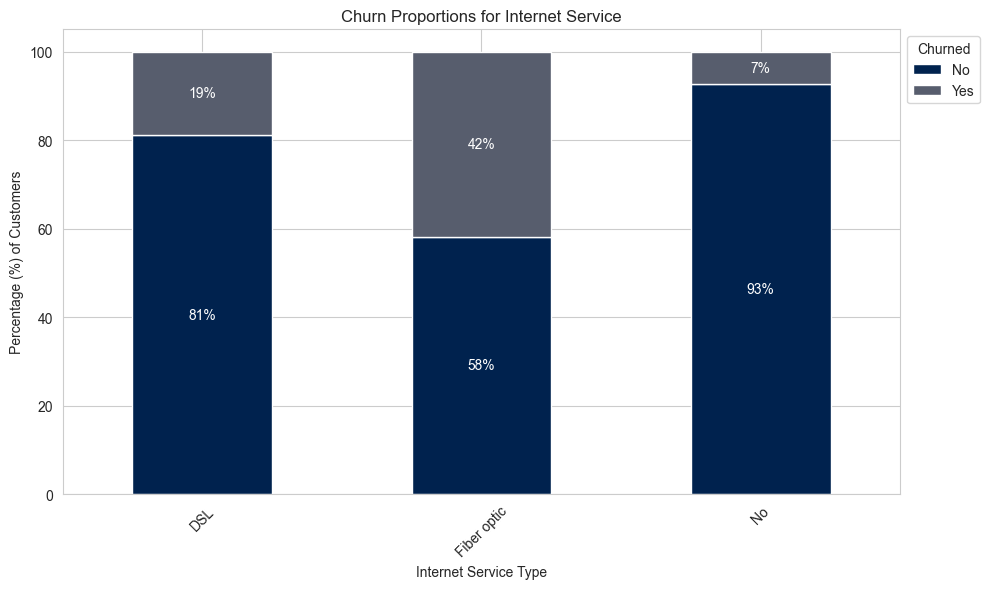

In [15]:
# Plot Internet Service Churn Proportions
plot_churn_stacked_bar(
    df, 
    'InternetService', 
    colors=colors,
    title='Churn Proportions for Internet Service',
    xlabel='Internet Service Type',
    save_path = 'churn_analysis_visuals/churn_by_internet_service'
)

- There are higher proportions of customers who churn when they have internet service. 
- Fiber Optic users have around double the churn ratio of DSL users, indicating potential issues with the service.

## Payment Method Churn Proportions

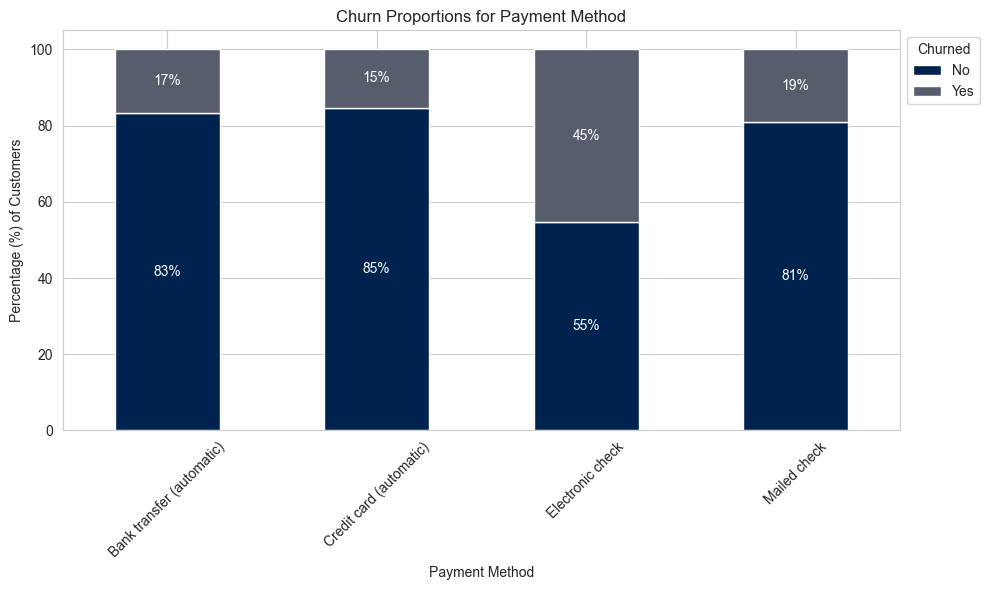

In [16]:
# Plot Payment Method Churn Proportions
plot_churn_stacked_bar(
    df, 
    'PaymentMethod', 
    colors=colors,
    title='Churn Proportions for Payment Method',
    xlabel='Payment Method',
    save_path = 'churn_analysis_visuals/churn_by_payment_method'
)

- Customers who pay via electronic checks have higher proportions of churning customers than those who use other payment methods (and those other payment methods have roughly the same levels of churn). 
- This may be a sign of serious technical problems with the electronic check payment method leading to churn.

## Online Security Churn Proportions

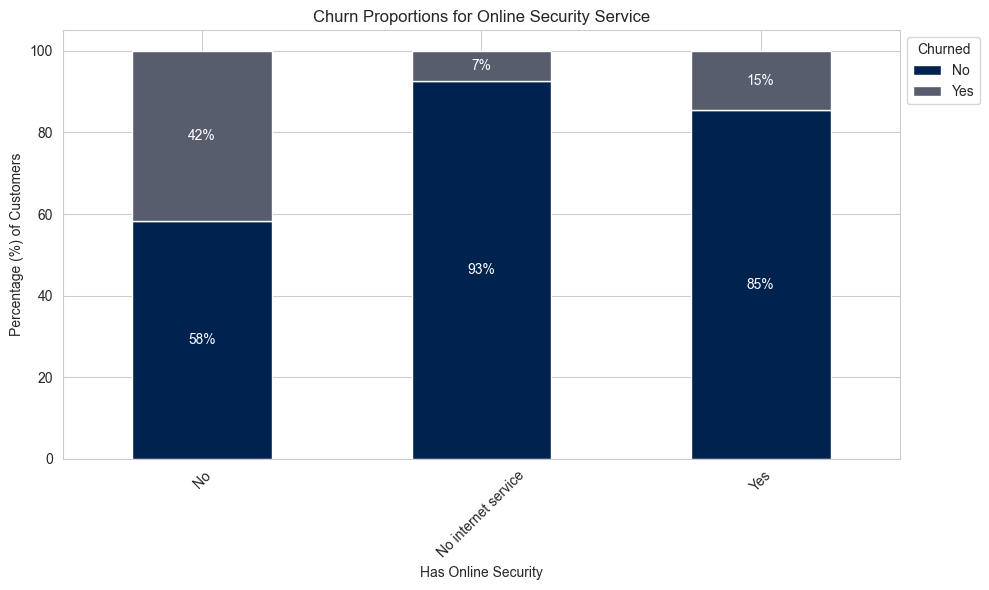

In [17]:
# Plot Online Security Churn Proportions
plot_churn_stacked_bar(
    df, 
    'OnlineSecurity', 
    colors=colors,
    title='Churn Proportions for Online Security Service',
    xlabel='Has Online Security',
    save_path = 'churn_analysis_visuals/churn_by_online_security'
)

- The churn rate seems to be higher for people who have not had online security.
- Market the benefits of having online security and the strengths of the company's service.

## Tech Support Churn Proportions

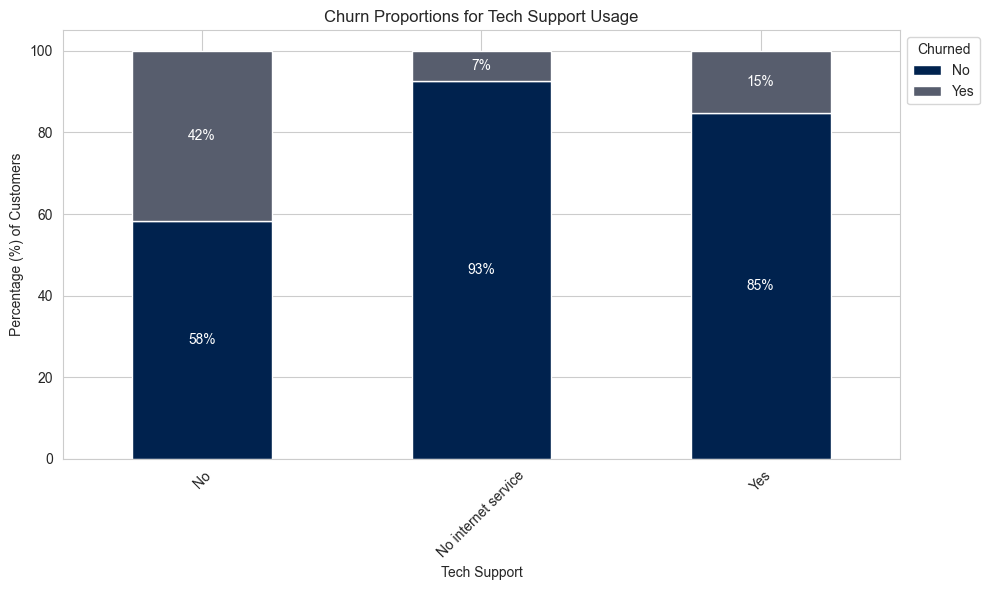

In [18]:
# Plot Tech Support Churn Proportions
plot_churn_stacked_bar(
    df, 
    'TechSupport', 
    colors=colors,
    title='Churn Proportions for Tech Support Usage',
    xlabel='Tech Support',
    save_path = 'churn_analysis_visuals/churn_by_Tech_Support'
)

- The churn rate seems to be higher for people who have not had tech support.
- Encourage customers to use tech support as the company's tech support team may be strong and helpful to customers.

## Streaming Movies Churn Proportions

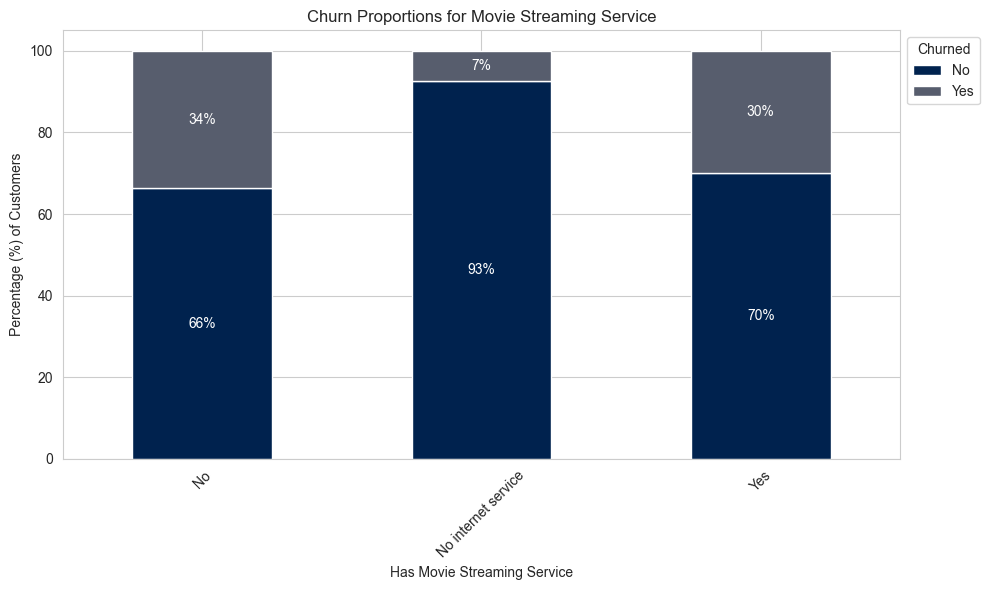

In [19]:
# Plot Streaming Movies Churn Proportions
plot_churn_stacked_bar(
    df, 
    'StreamingMovies', 
    colors=colors,
    title='Churn Proportions for Movie Streaming Service',
    xlabel='Has Movie Streaming Service',
    save_path = 'churn_analysis_visuals/churn_by_Streaming_Movies'
)

- The churn rate is roughly the same regardless of whether a customer has the Movie Streaming Service or not.

## Streaming TV Churn Proportions

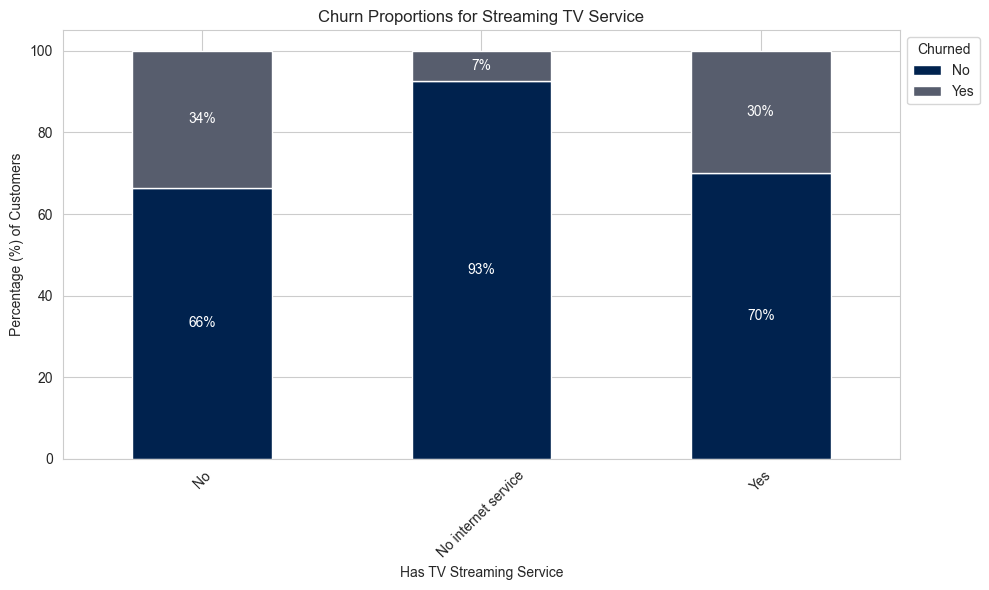

In [20]:
# Plot Streaming TV Churn Proportions
plot_churn_stacked_bar(
    df, 
    'StreamingTV', 
    colors=colors,
    title='Churn Proportions for Streaming TV Service',
    xlabel='Has TV Streaming Service',
    save_path = 'churn_analysis_visuals/churn_by_Streaming_TV'
)

- The churn rate is roughly the same regardless of whether a customer has the TV Streaming Service or not.

## Senior Citizen Churn Proportions

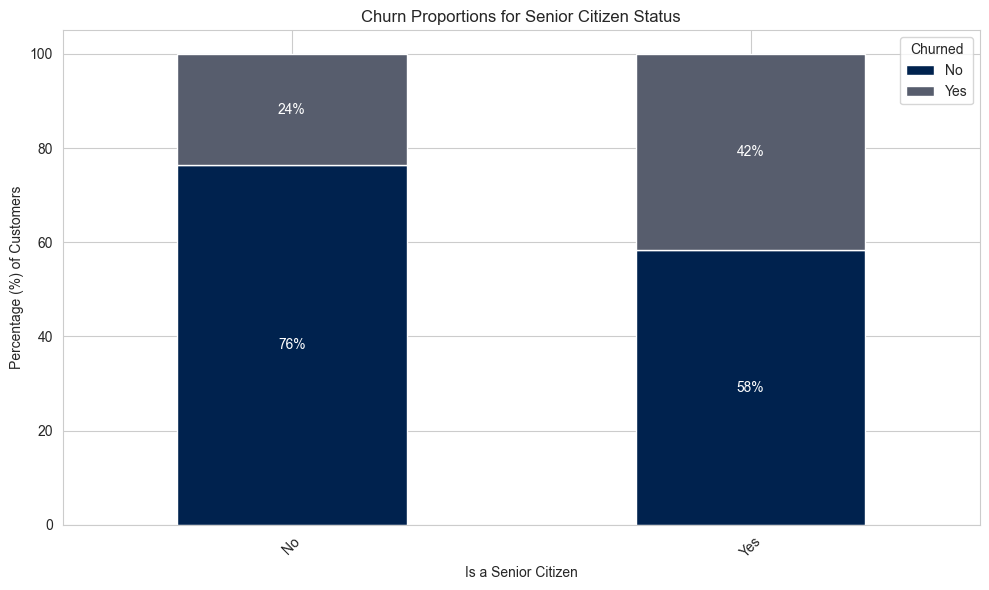

In [21]:
# Plot Senior Citizen Churn Proportions
plot_churn_stacked_bar(
    df, 
    'SeniorCitizen', 
    colors=colors,
    title='Churn Proportions for Senior Citizen Status',
    xlabel='Is a Senior Citizen',
    save_path = 'churn_analysis_visuals/churn_by_Senior_Citizen'
)

- Senior Citizens have twice the churn rate as non-senior citizens.
- Provide new or enhance existing senior discounts to prevent churn.
- Investigate if churn comes from switching plans or the consequences of aging (passing away).

## Dependents Churn Proportions

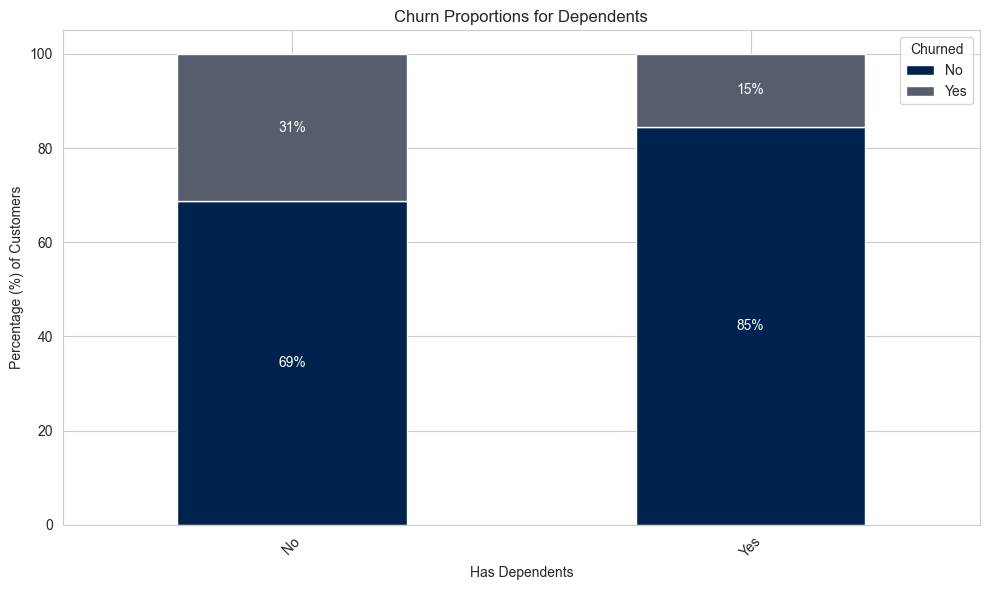

In [22]:
# Plot Dependents Churn Proportions
plot_churn_stacked_bar(
    df, 
    'Dependents', 
    colors=colors,
    title='Churn Proportions for Dependents',
    xlabel='Has Dependents',
    save_path = 'churn_analysis_visuals/churn_by_Dependents'
)

- It looks like people are less likely to churn if they have dependents.
- Those with dependents may have favorable rates for each additional line. Consider reducing single line prices or providing other offers to those with single lines.

## Gender Churn Proportions

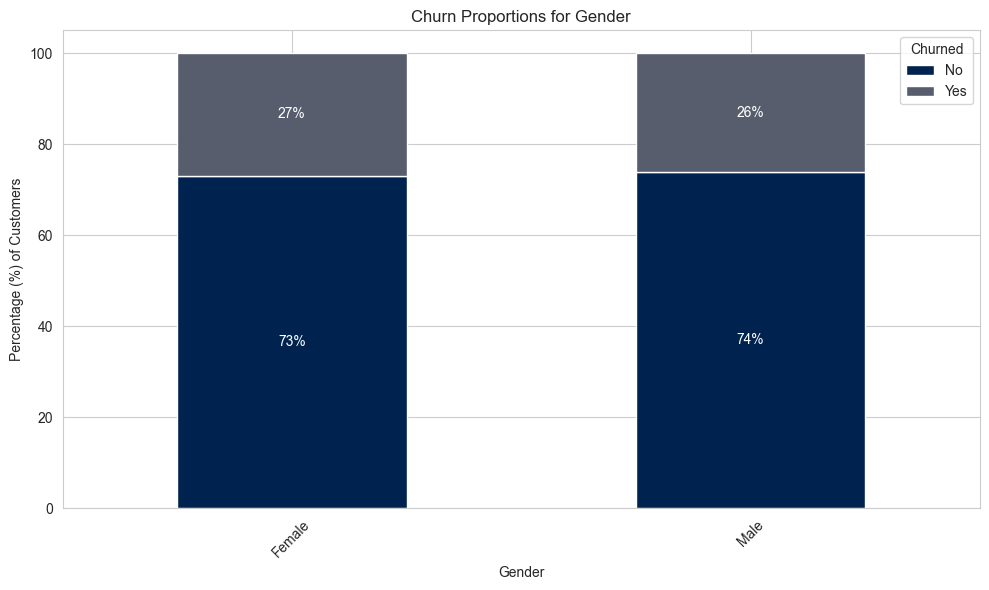

In [23]:
# Plot Dependents Churn Proportions
plot_churn_stacked_bar(
    df, 
    'Gender', 
    colors=colors,
    title='Churn Proportions for Gender',
    xlabel='Gender',
    save_path = 'churn_analysis_visuals/churn_by_Gender'
)

- There is little difference in churn rate across genders.

# Churn Counts

## Monthly Charges Churn Counts

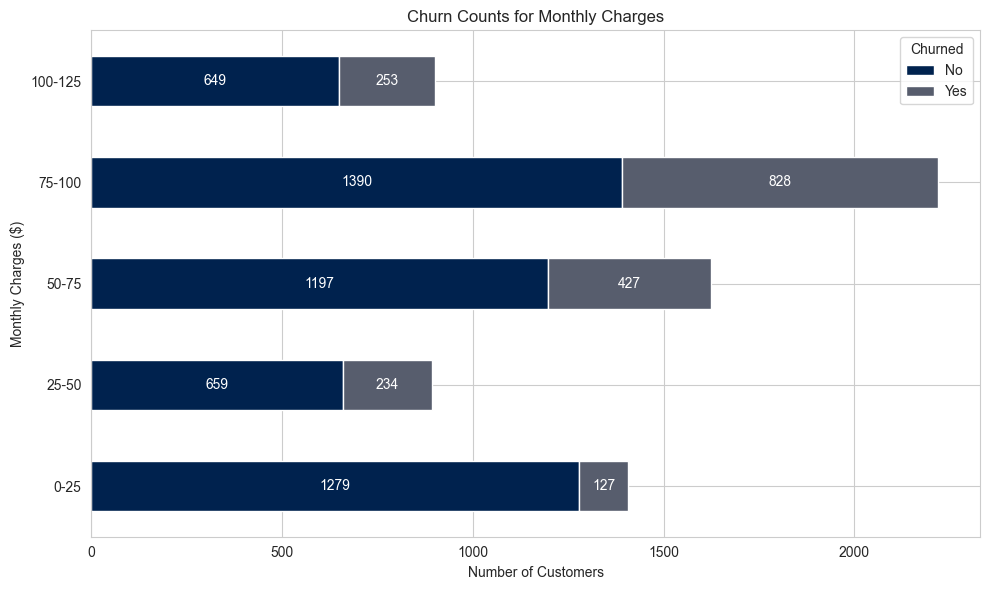

In [24]:
# Define bins and labels for MonthlyCharges
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200]  # adjust upper limit if needed
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200']

# Create a new column for charge buckets
df['MonthlyChargesBucket'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

# Create a crosstab of Monthly Charges vs Churn
monthly_charges_churn = pd.crosstab(df['MonthlyChargesBucket'], df['Churn'])

# Annotate the bars
ax = monthly_charges_churn.plot(
    kind='barh', stacked=True, figsize=(10, 6), color=colors
)

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')

# Plot the stacked bar chart
plt.title('Churn Counts for Monthly Charges')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Number of Customers')
plt.legend(title='Churned')
plt.tight_layout()
plt.savefig('churn_analysis_visuals/counts_monthly_charges')
plt.show()

- The bracket with the largest number of customers is the 75-100 Monthly Charges bracket. It also has the highest churn rate.
- The 25-50 and 100-125 brackets are roughly tied for the lowest number customers.
- Customers with 0-25 Monthly Charges have the lowest churn rate, but are likely on strictly data limited plans.

## Tenure Churn Counts

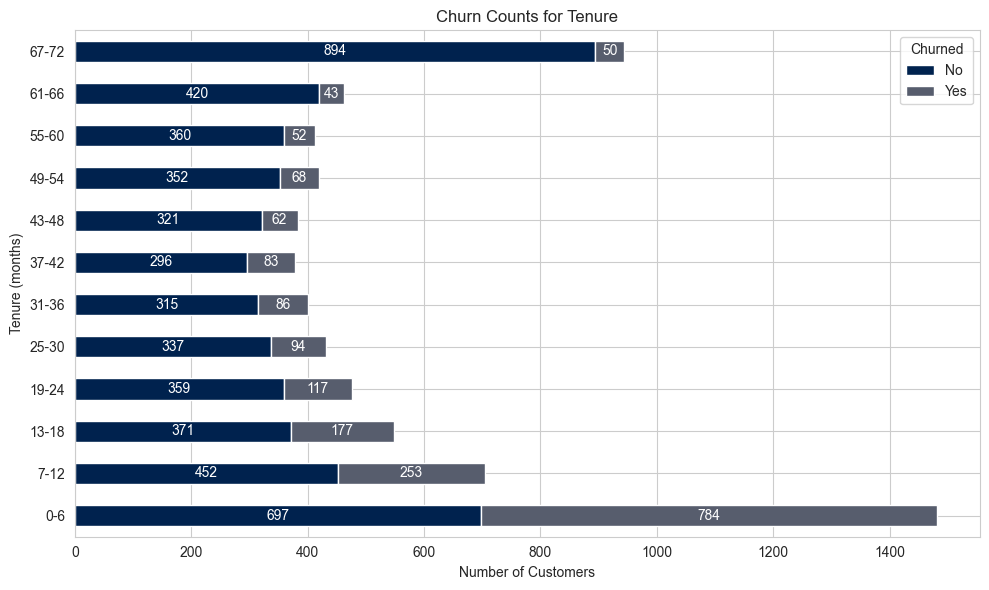

In [25]:
# Round Tenure values
df['Tenure'] = df['Tenure'].round().astype(int)

# Define your custom bins
tenure_bins = [0, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73]
tenure_labels = [f"{tenure_bins[i]}-{tenure_bins[i+1]-1}" for i in range(len(tenure_bins)-1)]

# Create tenure bins using your custom edges
df['TenureBin'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Crosstab of tenure bins vs. churn
tenure_bin_churn = pd.crosstab(df['TenureBin'], df['Churn'])

# Annotate the bars
tenure_ax = tenure_bin_churn.plot(
    kind='barh', stacked=True, figsize=(10, 6), color=colors
)

for container in tenure_ax.containers:
    tenure_ax.bar_label(container, label_type='center', color='white')

# Plot stacked histogram
plt.title('Churn Counts for Tenure')
plt.ylabel('Tenure (months)')
plt.xlabel('Number of Customers')
plt.legend(title='Churned')
plt.tight_layout()
plt.savefig('churn_analysis_visuals/counts_tenure')
plt.show()

- Customers tend to churn more in the first couple of months. 
- The churn ratio gradually decreases at higher levels of tenure.
- The tenure groups with the largest number of customers are the groups with the lowest months and the highest months. 

# Executive Summary

## Insights

- Customers with Monthly Charges ranging from \$75-100 are the most numerous and have the highest churn rates.
- The monthly charge brackets may represent different customer segments for targeted retention strategies.
- Most of the company's customers are new customers, making onboarding experiences very significant to reducing churn.
- Those on Month-to-Month contracts have around 14 times the churn rate of those on Two-Year contracts and around 4 times the churn rate of those on One-Year contracts.
- Around 89% of churning customers are on Month-to-Month contracts.
- Customers using the electronic payment method have higher churn rates than other payment method, which may indicate serious technical issues, poor user interface for inputting information, or lack of security for the payment method.
- Senior Citizens have higher churn rates than non-seniors.
- Customers using the Online Security service or Tech Support have lower churn rates than those who do not use them.

## Recommendations

- Implement onboarding campaigns to engage new customers early.
- Offer loyalty incentives (such as discounts after 6 months) to minimize early churn.
- Use predictive churn models to identify at-risk new customers and intervene proactively.
- Promote add-ons and other services (e.g., streaming, international calling) to increase ARPU (Average Revenue Per User).
- Bundle upgrades with tenure-based discounts to encourage plan migration.
- Study what keeps the highest tenure customers loyal: plan stability, customer service, etc. Use these insights to replicate loyalty drivers for newer customers.
- Offer referral bonuses to leverage the satisfaction of the highest tenure customers.
- Determine if high total charges correlates with churn or dissatisfaction.
- Consider cap-based pricing models or tiered loyalty rewards to soften the impact of long-term costs when customers track their expenses.
- Introduce family or multi-line bundles with more attractive pricing to encourage customers to add more lines.
- Develop targeted strategies for different customer segments.
- Investigate potential issues with the security or the user interface for the electronic payment system.
- Market the benefits of having online security and the strengths of the company's service.
- Encourage customers to use tech support as the company's tech support team may be strong and helpful to customers.
- Provide new or enhance existing senior discounts to prevent churn among senior customers. Investigate if the higher churn rates from senior citizens comes from switching plans or high age risks (passing away).
- Those with dependents may have favorable rates for each additional line. Consider reducing single line prices or providing other offers to those with single lines.
- Since customers tend to churn significantly more after their first month, the company should prioritize deals and promotions that lock the customer into a 1 year or 2 contract.
- The company can offer customers discounted or free phones or discounts through statement credits to win over new customers, while locking them into 1 or 2 year contracts.
- Since churn rates drop substantially after the first year, the company may benefit from offering upfront incentives to encourage long-term commitments and reduce early-stage churn (which is where churn rate is the highest).

## Clarifying Questions

- Why do customers tend to churn more when they have internet services with the company?
- Are there any issues with the company's internet services such as connection speed and stability, especially for fiber optic types?
- Are there any technical problems with the payment system for electronics checks? Does this lead customers to churn?
- Why do customers tend to churn most often after the first 1 or 2 months with the company? Is the onboarding experience lacking for new customers?
- Are senior discounts offered? Are they discounted enough to prevent churn from senior customers?
- How does the company's pricing and service coverage compare to competitors?